<a href="https://colab.research.google.com/github/DhruvDarda/Housing-price-prediction/blob/main/HousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB



The features can be summarized as follows:   

CRIM: This is the per capita crime rate by town.   
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.   
INDUS: This is the proportion of non-retail business acres per town.   
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise).  
NOX: This is the nitric oxides concentration (parts per 10 million).  
RM: This is the average number of rooms per dwelling.    
AGE: This is the proportion of owner-occupied units built prior to 1940.    
DIS: This is the weighted distances to five Boston employment centers.  
RAD: This is the index of accessibility to radial highways.  
TAX: This is the full-value property-tax rate per $10,000.   

PTRATIO: This is the pupil-teacher ratio by town.  
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town.  
LSTAT: This is the percentage lower status of the population.  
MEDV: This is the median value of owner-occupied homes in $1000s.  


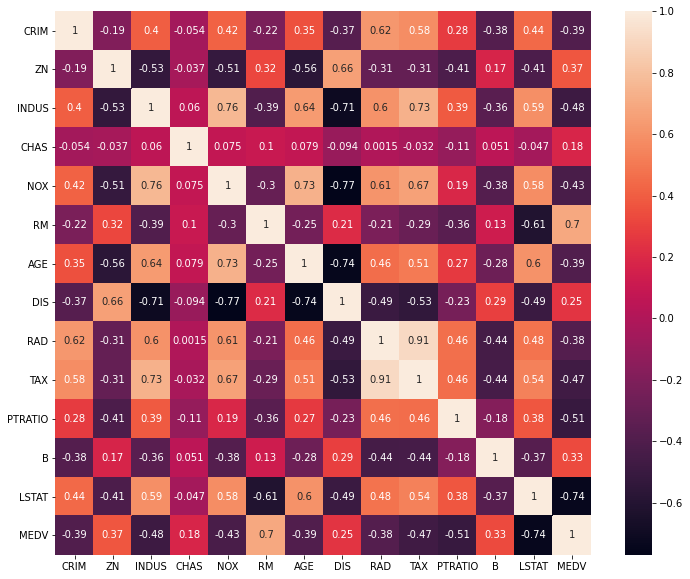

In [ ]:
plt.figure(figsize=(12,10))
corr_plot = sns.heatmap(df.corr(), annot=True)

Positive corr: RM, ZN, B, DIS

Negative corr: LSTAT, PTRATIO, INDUS, TAX, NOX

In [ ]:
df.duplicated().sum()

0

In [ ]:
#df = df.drop(['CRIM', ''])

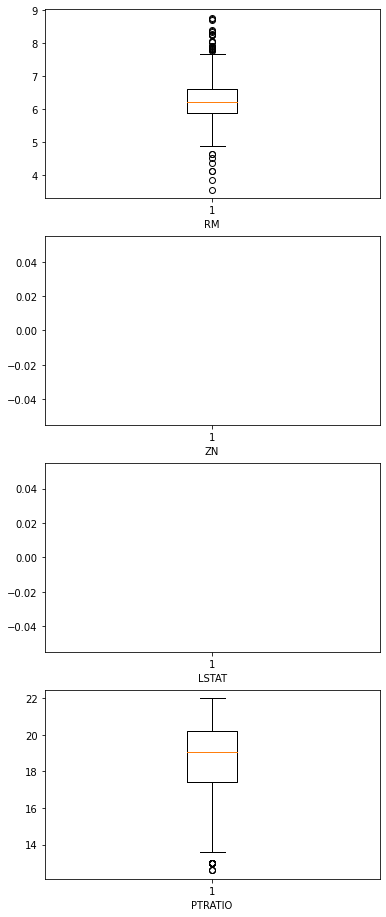

In [ ]:
fig, axs = plt.subplots(4, figsize=(6,16))
p_corr = ['RM','ZN','LSTAT','PTRATIO']
for i in range(len(p_corr)):
  axs[i].boxplot(df[p_corr[i]])
  axs[i].set_xlabel(p_corr[i])
plt.show()

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
X = df.dropna().iloc[:,0:13]
y = df.dropna().iloc[:,-1]

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=4)
y = np.round(df.dropna()['MEDV'])

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5044.573637
1,ZN,5880.118440
2,INDUS,703.365351
3,CHAS,50.407501
4,NOX,3.883311
5,RM,18.075884
6,AGE,1896.265363
7,DIS,132.055576
8,RAD,1163.745035
9,TAX,12242.485632


In [ ]:
featureScores.nlargest(5,"Score")

,Specs,Score
9,TAX,12242.485632
1,ZN,5880.118440
0,CRIM,5044.573637
11,B,2709.416310
6,AGE,1896.265363


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
df = df.dropna()
X=df[['TAX','ZN','CRIM','B','AGE','RM','LSTAT','PTRATIO']]
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [ ]:
mm = MinMaxScaler()
X_train_s = mm.fit_transform(X_train)
X_test_s = mm.transform(X_test)

In [ ]:
reg = LassoCV(cv=5, random_state=0).fit(X_train_s, y_train)
reg.score(X_test_s, y_test)

0.6069142141207267

In [ ]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train_s, y_train)
clf.score(X_test_s, y_test)

0.5885672342665221

In [ ]:
ss = StandardScaler()
X_train_s = mm.fit_transform(X_train)
X_test_s = mm.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfg.score(X_test, y_test)

0.7250108195278953

In [ ]:
rfg.score(X_train, y_train)

0.9780295848133372

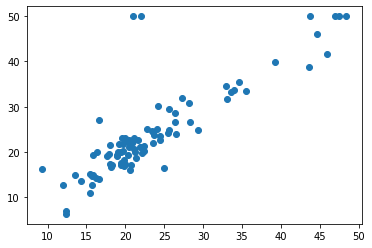

In [ ]:
plt.scatter(rfg.predict(X_test), y_test)